In [1]:
import math as m
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mastercard(x,y):
    circ_der = (x-0.7)**2 + y**2
    circ_izq = (x+0.7)**2 + y**2
    if circ_der <= 1 or circ_izq <=1:
        respuesta = True
    else:
        respuesta = False
    return respuesta

def m_mouse(x,y):
    respuesta = False
    c1 = x**2 + y**2
    c2 , c3 = (x-0.75)**2 + (y-0.75)**2 , (x+0.75)**2 + (y-0.75)**2
    if c1 <=1 or c2 <= 0.5 or c3 <= 0.5:
        respuesta = True
    return respuesta

def Vcuadcuad(x,y,elec_int):
    Nx , Ny = len(x) , len(y)
    malla = np.zeros((Nx,Ny))
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if  elec_int(x[i],y[j]):
                malla[i,j] = 1
            else:
                malla[i,j] = rd.random()
    return malla

In [3]:
def Relajar(V,V0=1):
    Nx , Ny = V.shape
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            if V[i,j] != 1:
                V[i,j] = 0.25*( V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1] )
    return V

def Met_Jocobi(V,V0=1,err=1e-4):
    diferencia = 1
    while diferencia > err:
        for i in range(20):
            V = Relajar(V,V0=V0)
        V_ref = Relajar(np.copy(V))
        diferencia = np.max(abs(V_ref-V))
    return V

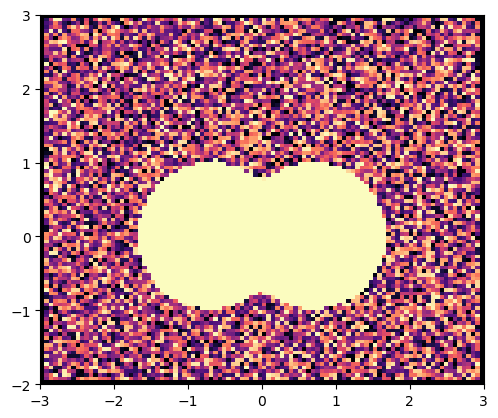

In [4]:
x , y = np.linspace(-3,3,100) , np.linspace(-2,3,100)
pot = Vcuadcuad(x,y,mastercard)
plt.imshow(pot.transpose(),
           extent=(x[0],x[-1],y[0],y[-1]),
           origin='lower',
           cmap='magma')
plt.show()

In [5]:
pot = Met_Jocobi(pot)

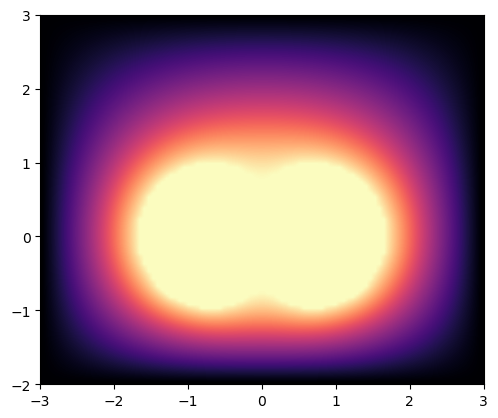

In [6]:
plt.imshow(pot.transpose(),
           interpolation='bilinear',
           extent=(x[0],x[-1],y[0],y[-1]),
           origin='lower',
           cmap='magma')
plt.show()

In [7]:
Ex,Ey = np.gradient(-pot.transpose())

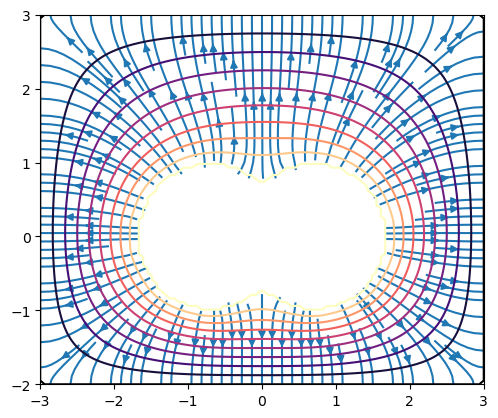

In [8]:
niveles = np.linspace(0,0.999,10)
plt.streamplot(x,y,Ey,Ex,density=1.5)
plt.contour(x,y,pot.transpose(),
            levels=niveles,
            origin='lower',
            cmap='magma')
plt.gca().set_aspect('equal')
plt.show()

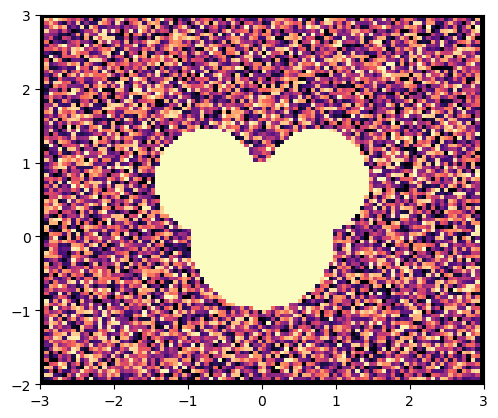

In [9]:
x , y = np.linspace(-3,3,100) , np.linspace(-2,3,100)
pot = Vcuadcuad(x,y,m_mouse)
plt.imshow(pot.transpose(),
           extent=(x[0],x[-1],y[0],y[-1]),
           origin='lower',
           cmap='magma')
plt.show()

In [10]:
pot = Met_Jocobi(pot)

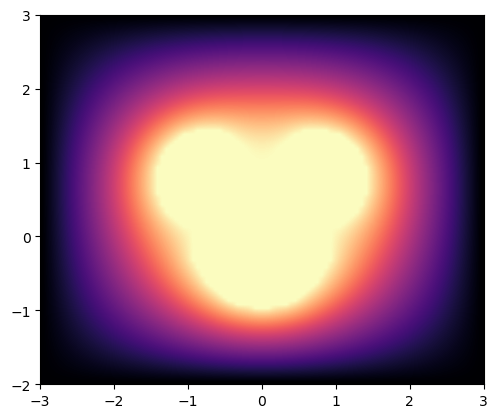

In [11]:
plt.imshow(pot.transpose(),
           interpolation='bilinear',
           extent=(x[0],x[-1],y[0],y[-1]),
           origin='lower',
           cmap='magma')
plt.show()

In [12]:
Ex,Ey = np.gradient(-pot.transpose())

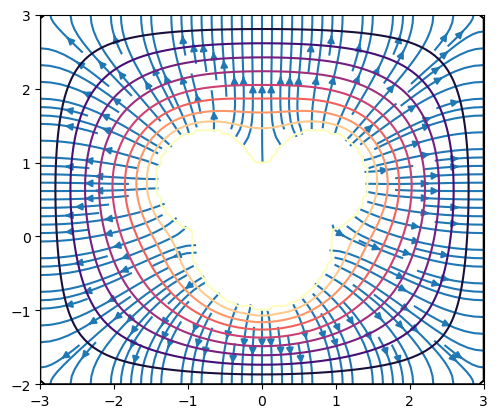

In [13]:
niveles = np.linspace(0,0.999,10)
plt.streamplot(x,y,Ey,Ex,density=1.5)
plt.contour(x,y,pot.transpose(),
            levels=niveles,
            origin='lower',
            cmap='magma')
plt.gca().set_aspect('equal')
plt.show()

In [14]:
def chk_ind(x,y,V):
    pts = []
    for i in range(1,len(x)-1):
        for j in range(1,len(y)-1):
            if V[i,j] !=1 :
                pts.append([i,j])
    return pts

def Relajar_v2(V,inds):
    for ind in inds:
        V[ind[0],ind[1]] = 0.25*( V[ind[0]+1,ind[1]] + V[ind[0]-1,ind[1]] + V[ind[0],ind[1]+1] + V[ind[0],ind[1]-1] )
    return V

In [15]:
indices = chk_ind(x,y,pot)